# **Blossom Bank is a Multinational financial services group that want to build a Machine Learnig model to predict online payment fraud**

In [ ]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#load Dataset
data= pd.read_csv('Online_Payment_Fraud_Detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [ ]:
#key Statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [ ]:
#Dataframe Shape
data.shape


(1048575, 10)

In [ ]:
# missing Data
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
#Data Transaction Type
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
data['type'].value_counts().to_frame()

,type
CASH_OUT,373641
PAYMENT,353873
CASH_IN,227130
TRANSFER,86753
DEBIT,7178


In [ ]:
# isFraud data value counts
data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [ ]:
# step data value counts
data['step'].value_counts()

19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: step, Length: 95, dtype: int64

ALLOCATING FRAUDULENT AND NON-FRAUDULENT DATA


In [ ]:
def isfraud(x):
  if x==1:
     return 'isFraud'
  else:
    return 'notFraud' 
data['isFraud_label']= data['isFraud'].apply(isfraud)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFraud_label
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,notFraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,notFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,isFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,isFraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,notFraud
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,notFraud
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,notFraud
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,notFraud
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,notFraud


# EXPLORATORY DATA ANALYSIS AND VISUALIZATION


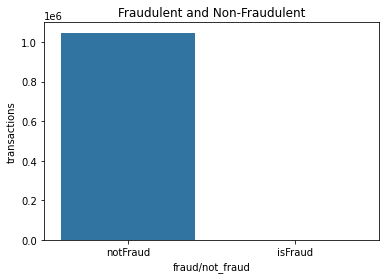

In [ ]:
# visualisation chat showing the distribution between Fraudulent and Non-Fraudulent
plt.title('Fraudulent and Non-Fraudulent')
sns.countplot(data=data, x= 'isFraud_label')
plt.xlabel('fraud/not_fraud')
plt.ylabel('transactions')
plt.show()

From the above Analysis there is less fraudulent activity

In [ ]:
data['isFraud_label'].value_counts()

notFraud    1047433
isFraud        1142
Name: isFraud_label, dtype: int64

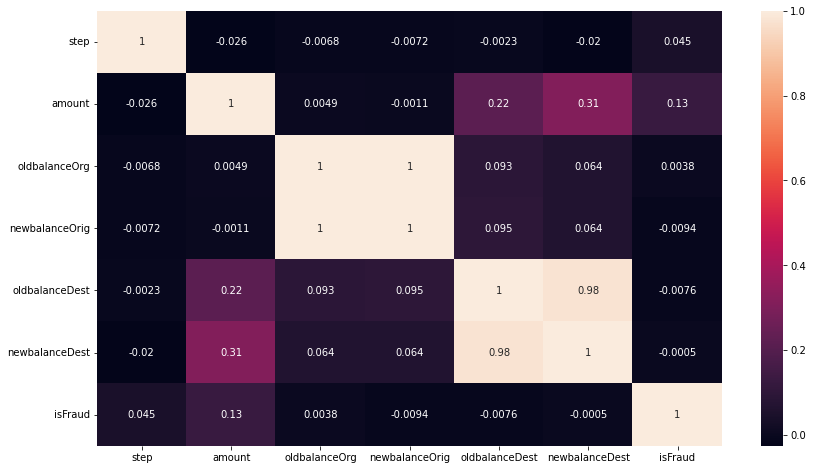

In [ ]:
# showing Relationship between each column using heatmap
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True)

The heat map shows the relationship between all the variables.
increase in relationship between the values show a positive value, while a decrease in the relationship shows a negative value.
there is a weak corrolation between the amounts of the oldbalanceDest and newbalanceDest.

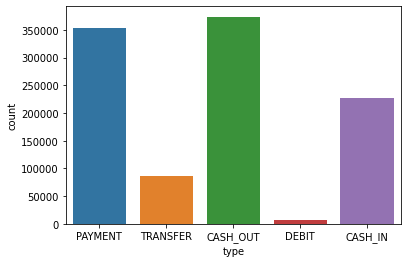

In [ ]:
# Discription of Data Type
sns.countplot(x='type',data=data)

The payment and the cash out method are prefered.

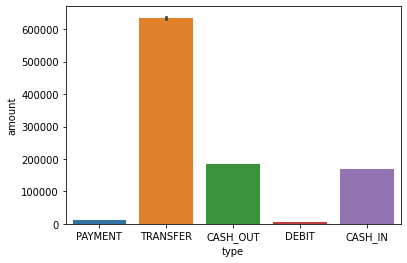

In [ ]:
# Correlation between data type and amount
sns.barplot(x='type', y='amount', data=data)

correlations
based on the barplot above, amongs all the payment types the transfer method has the highest amount.

**UNIVERIATE ANALYSIS**

Text(0.5, 1.0, 'Distribution of Amount spent')

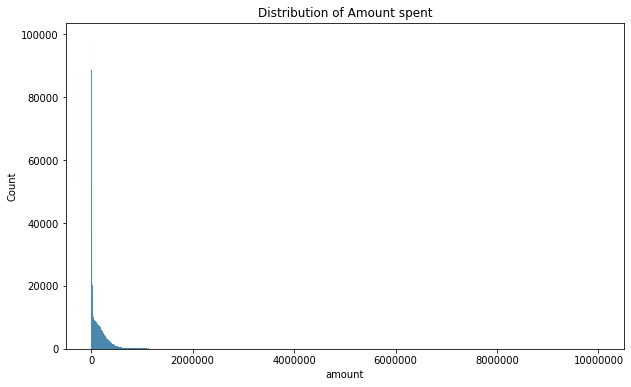

In [ ]:
# Distribution of Amount spent
plt.figure(figsize=(10,6))
sns.histplot(data['amount']);
plt.ticklabel_format(style='plain')
plt.title('Distribution of Amount spent')

it indicates the amount spent is low

In [ ]:
#oldbalanceOrg data count
data['oldbalanceOrg'].value_counts()

0.00           342214
10100000.00       433
10300000.00       424
10200000.00       421
10900000.00       387
                ...  
295871.52           1
306220.00           1
133756.67           1
329511.00           1
80584.95            1
Name: oldbalanceOrg, Length: 391033, dtype: int64

Text(0, 0.5, 'frequency')

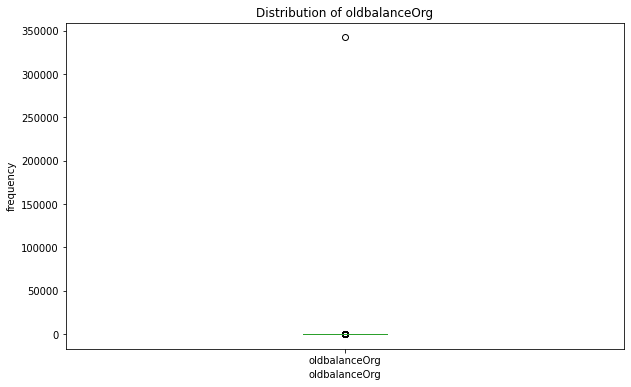

In [ ]:
# Distribution of oldbalance
plt.figure(figsize=(10,6))
data['oldbalanceOrg'].value_counts().plot(kind='box');
plt.title('Distribution of oldbalanceOrg')
plt.xlabel('oldbalanceOrg')
plt.ylabel('frequency')

In [ ]:
# is Fraud data value count
data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

Text(0, 0.5, 'Frequency')

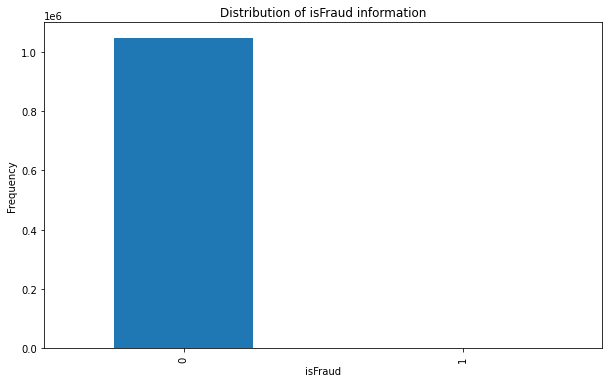

In [ ]:
# Distribution of fraud
plt.figure(figsize=(10,6))
data['isFraud'].value_counts().plot(kind='bar');
plt.title('Distribution of isFraud information')
plt.xlabel('isFraud')
plt.ylabel('Frequency')

In [ ]:
# Data type value count
data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

Text(0, 0.5, 'Frequency')

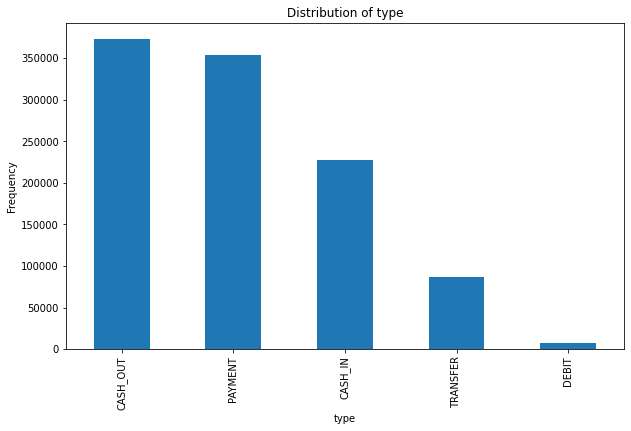

In [ ]:
# Distribution of Data Type
plt.figure(figsize=(10,6))
data['type'].value_counts().plot(kind='bar')
plt.title('Distribution of type')
plt.xlabel('type')
plt.ylabel('Frequency')

The cash out and payment method is preferred

MULTIVARIATE ANALYSIS

Text(0.5, 1.0, 'correlation between type, amount and isFraud')

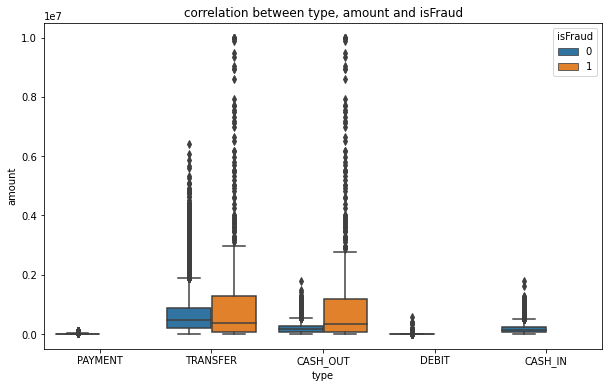

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x= 'type',y='amount', hue='isFraud', data=data)
plt.title('correlation between type, amount and isFraud')

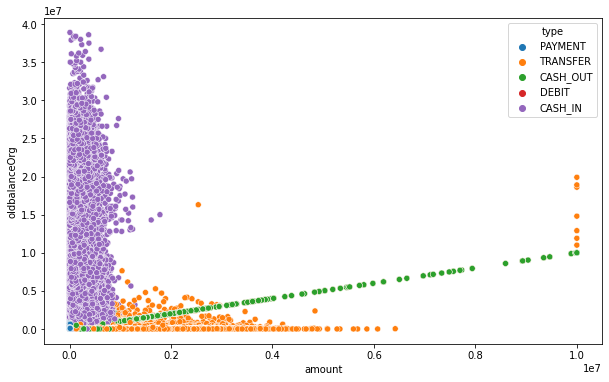

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='amount',y='oldbalanceOrg',hue='type',data=data)

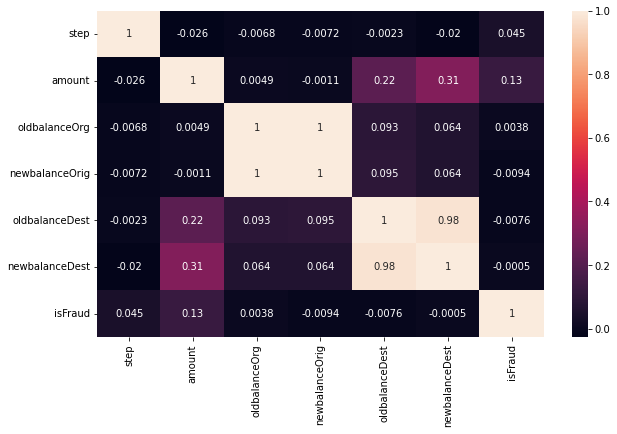

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

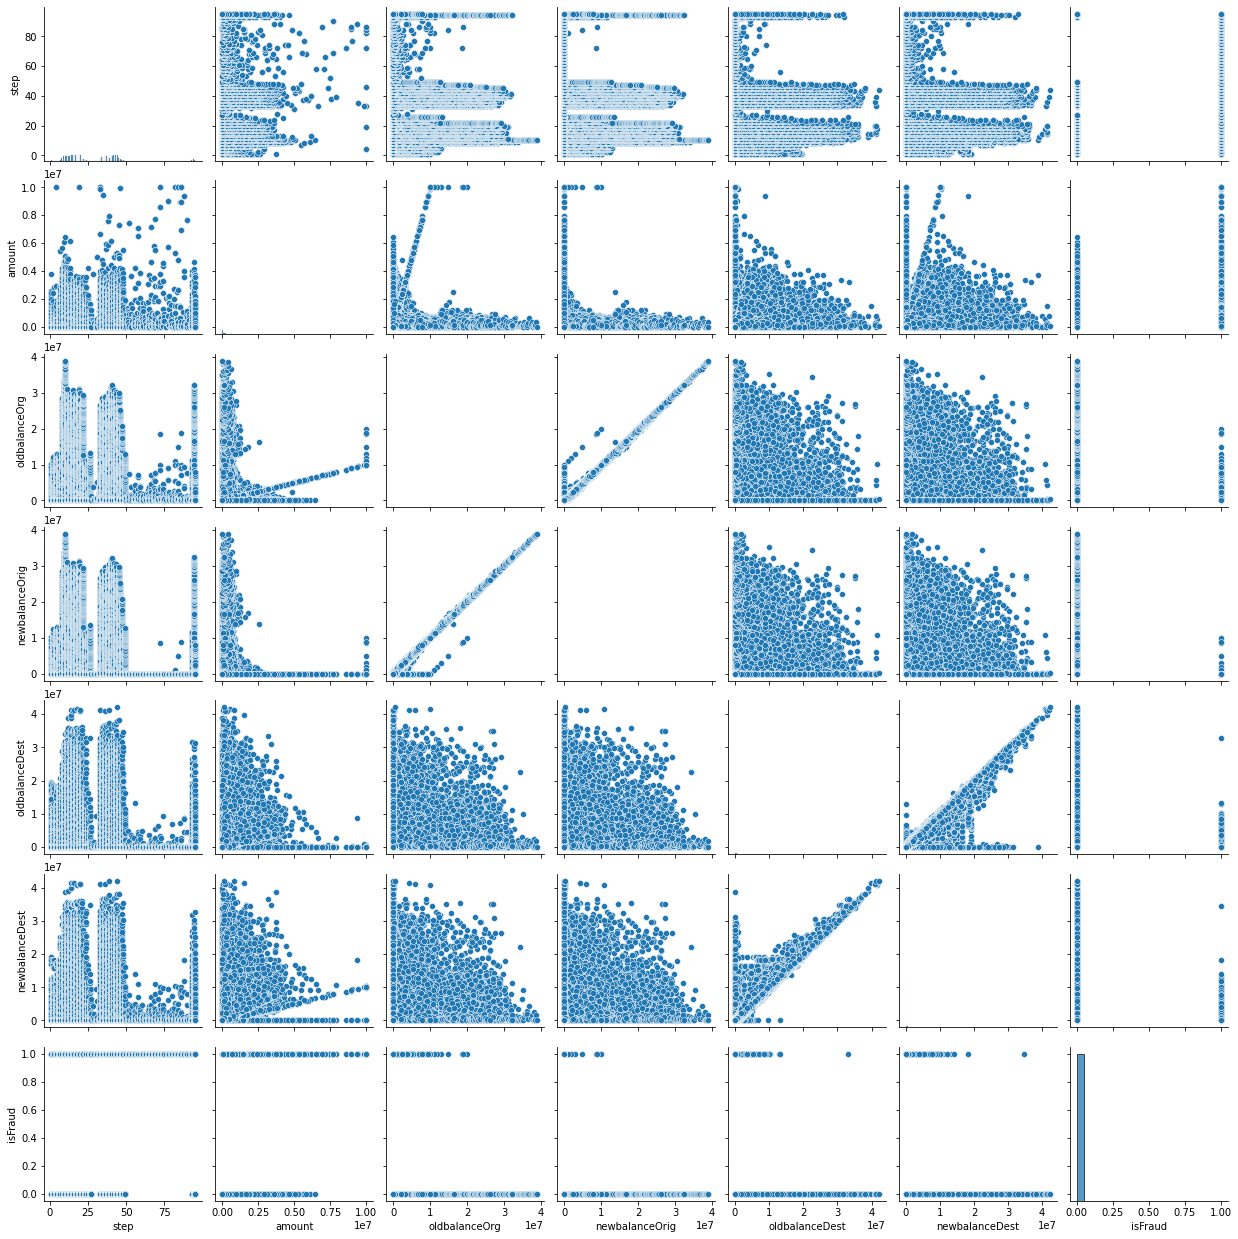

In [ ]:
sns.pairplot(data);

# **FEATURE ENGINEERING**

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFraud_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,notFraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,notFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,isFraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,isFraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,notFraud


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFraud_label'],
      dtype='object')

In [ ]:
at=['type']

In [ ]:
at_dummies=pd.get_dummies(data[at])

In [ ]:
at_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [ ]:
new=pd.concat([data, at_dummies], axis=1)
print(new.shape)
new.head()

(1048575, 16)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFraud_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,notFraud,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,notFraud,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,isFraud,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,isFraud,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,notFraud,0,0,0,1,0


In [ ]:
new_data=new.drop(at, axis=1)
new_data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFraud_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,notFraud,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,notFraud,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,isFraud,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,isFraud,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,notFraud,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,notFraud,0,1,0,0,0
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,notFraud,0,0,0,1,0
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,notFraud,0,0,0,1,0
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,notFraud,0,0,0,1,0


# MODEL SELECTION, TRAINING AND VALIDATION

In [ ]:
y= new_data['isFraud']

In [ ]:
features= new_data.drop('isFraud', axis=1)

In [ ]:
X=features

In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [ ]:
X.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,notFraud,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,notFraud,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,isFraud,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,isFraud,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,notFraud,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, stratify=y, random_state=3)

In [ ]:
print('\n', X_train.head(3))
print('\n',X_test.head(3))
print('\n',y_train.head(3))
print('\n',y_test.head(3))


         step     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
727715    37  219529.90   C379164531     9767608.47      9987138.37   
469900    19  177619.56   C269972707       40461.00       218080.56   
209200    13    6631.67  C1293080895      115571.46       108939.79   

           nameDest  oldbalanceDest  newbalanceDest isFraud_label  \
727715   C225831023      3288639.75      3069109.85      notFraud   
469900  C1760161929            0.00            0.00      notFraud   
209200  M1847008240            0.00            0.00      notFraud   

        type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
727715             1              0           0             0              0  
469900             1              0           0             0              0  
209200             0              0           0             1              0  

          step     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
445808     19  451892.62   C399781101         

TRAINING THE MODEL WITH RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#DEFINE MODEL
model= RandomForestClassifier(random_state=4, n_estimators=20)

In [ ]:
model.fit(X_train, y_train)

ValueError: ignored

TESTING USING LOGISTICS REGRESSION MODEL EVALUATION

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score,precision_recall_curve,average_precision_score,roc_auc_score